# Car Price Prediction-Regression



In [4]:
# Importing requried packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from matplotlib.patches import ConnectionPatch

### Calling kaggleApi

In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [6]:
data = api.dataset_list(search='Price Prediction -Multiple Linear Regression')

In [7]:
for i in data:
    api.dataset_download_files(str(i),path=os.getcwd()+'/kaggle_datasets')

In [8]:
df = pd.read_csv(r"C:\Users\Madhuri\Downloads\car_price.csv")

In [9]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
len(df.columns)

26

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                203 non-null    int64  
 1   symboling         203 non-null    int64  
 2   name              203 non-null    object 
 3   fueltypes         203 non-null    object 
 4   aspiration        203 non-null    object 
 5   doornumbers       203 non-null    object 
 6   carbody           203 non-null    object 
 7   drivewheels       203 non-null    object 
 8   enginelocation    203 non-null    object 
 9   wheelbase         203 non-null    float64
 10  carlength         203 non-null    float64
 11  carwidth          203 non-null    float64
 12  carheight         203 non-null    float64
 13  curbweight        203 non-null    int64  
 14  enginetype        203 non-null    object 
 15  cylindernumber    203 non-null    object 
 16  enginesize        203 non-null    int64  
 1

In [12]:
data=df.drop('ID',axis=1)

In [13]:
len(data.columns)

25

In [14]:
data.isnull().sum()

symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [15]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
198    False
199    False
200    False
201    False
202    False
Length: 203, dtype: bool

In [16]:
data.name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [17]:
Car_name = data['name'].apply(lambda x : x.split(' ')[0])
data.insert(3,'Car_name',Car_name)
data.drop(['name'],axis=1,inplace=True)
data

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
199,-1,gas,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
200,-1,gas,volvo,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
201,-1,diesel,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [18]:
data['Car_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [19]:
data['Car_name'] = data['Car_name'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [20]:
data.columns

Index(['symboling', 'fueltypes', 'Car_name', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [21]:
dataobjects = data.select_dtypes("object")
column = ['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype',
     'cylindernumber', 'fuelsystem']
for i in column:
    print("uniques values for {0} :".format(i), data[i].unique())

uniques values for fueltypes : ['gas' 'diesel']
uniques values for aspiration : ['std' 'turbo']
uniques values for doornumbers : ['two' 'four']
uniques values for carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
uniques values for drivewheels : ['rwd' 'fwd' '4wd']
uniques values for enginelocation : ['front' 'rear']
uniques values for enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
uniques values for cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
uniques values for fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [22]:
column = ['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation',
          'enginetype', 'cylindernumber', 'fuelsystem']
data['drivewheels']=data['drivewheels'].apply(lambda x: "drivewheels_fwd" if x=="fwd" else "drivewheels_not_fwd")
data['aspiration']=data['aspiration'].apply(lambda x: "aspiration_std" if x=="std" else "aspiration_turbo")
data['doornumbers']=data['doornumbers'].apply(lambda x: "doornumbers2" if x=="two" else "doornumbers4")
data['enginelocation']=data['enginelocation'].apply(lambda x: "enginelocation_front" if x=="front"
                                                    else "enginelocation_rear")
data['enginetype']=data['enginetype'].apply(lambda x: "enginetype_ohc" if x=="ohc" else "enginetype_not_ohc")
data['cylindernumber']=data['cylindernumber'].apply(lambda x: "cylindernumber_not4" if x!="four" else "cylindernumber4")

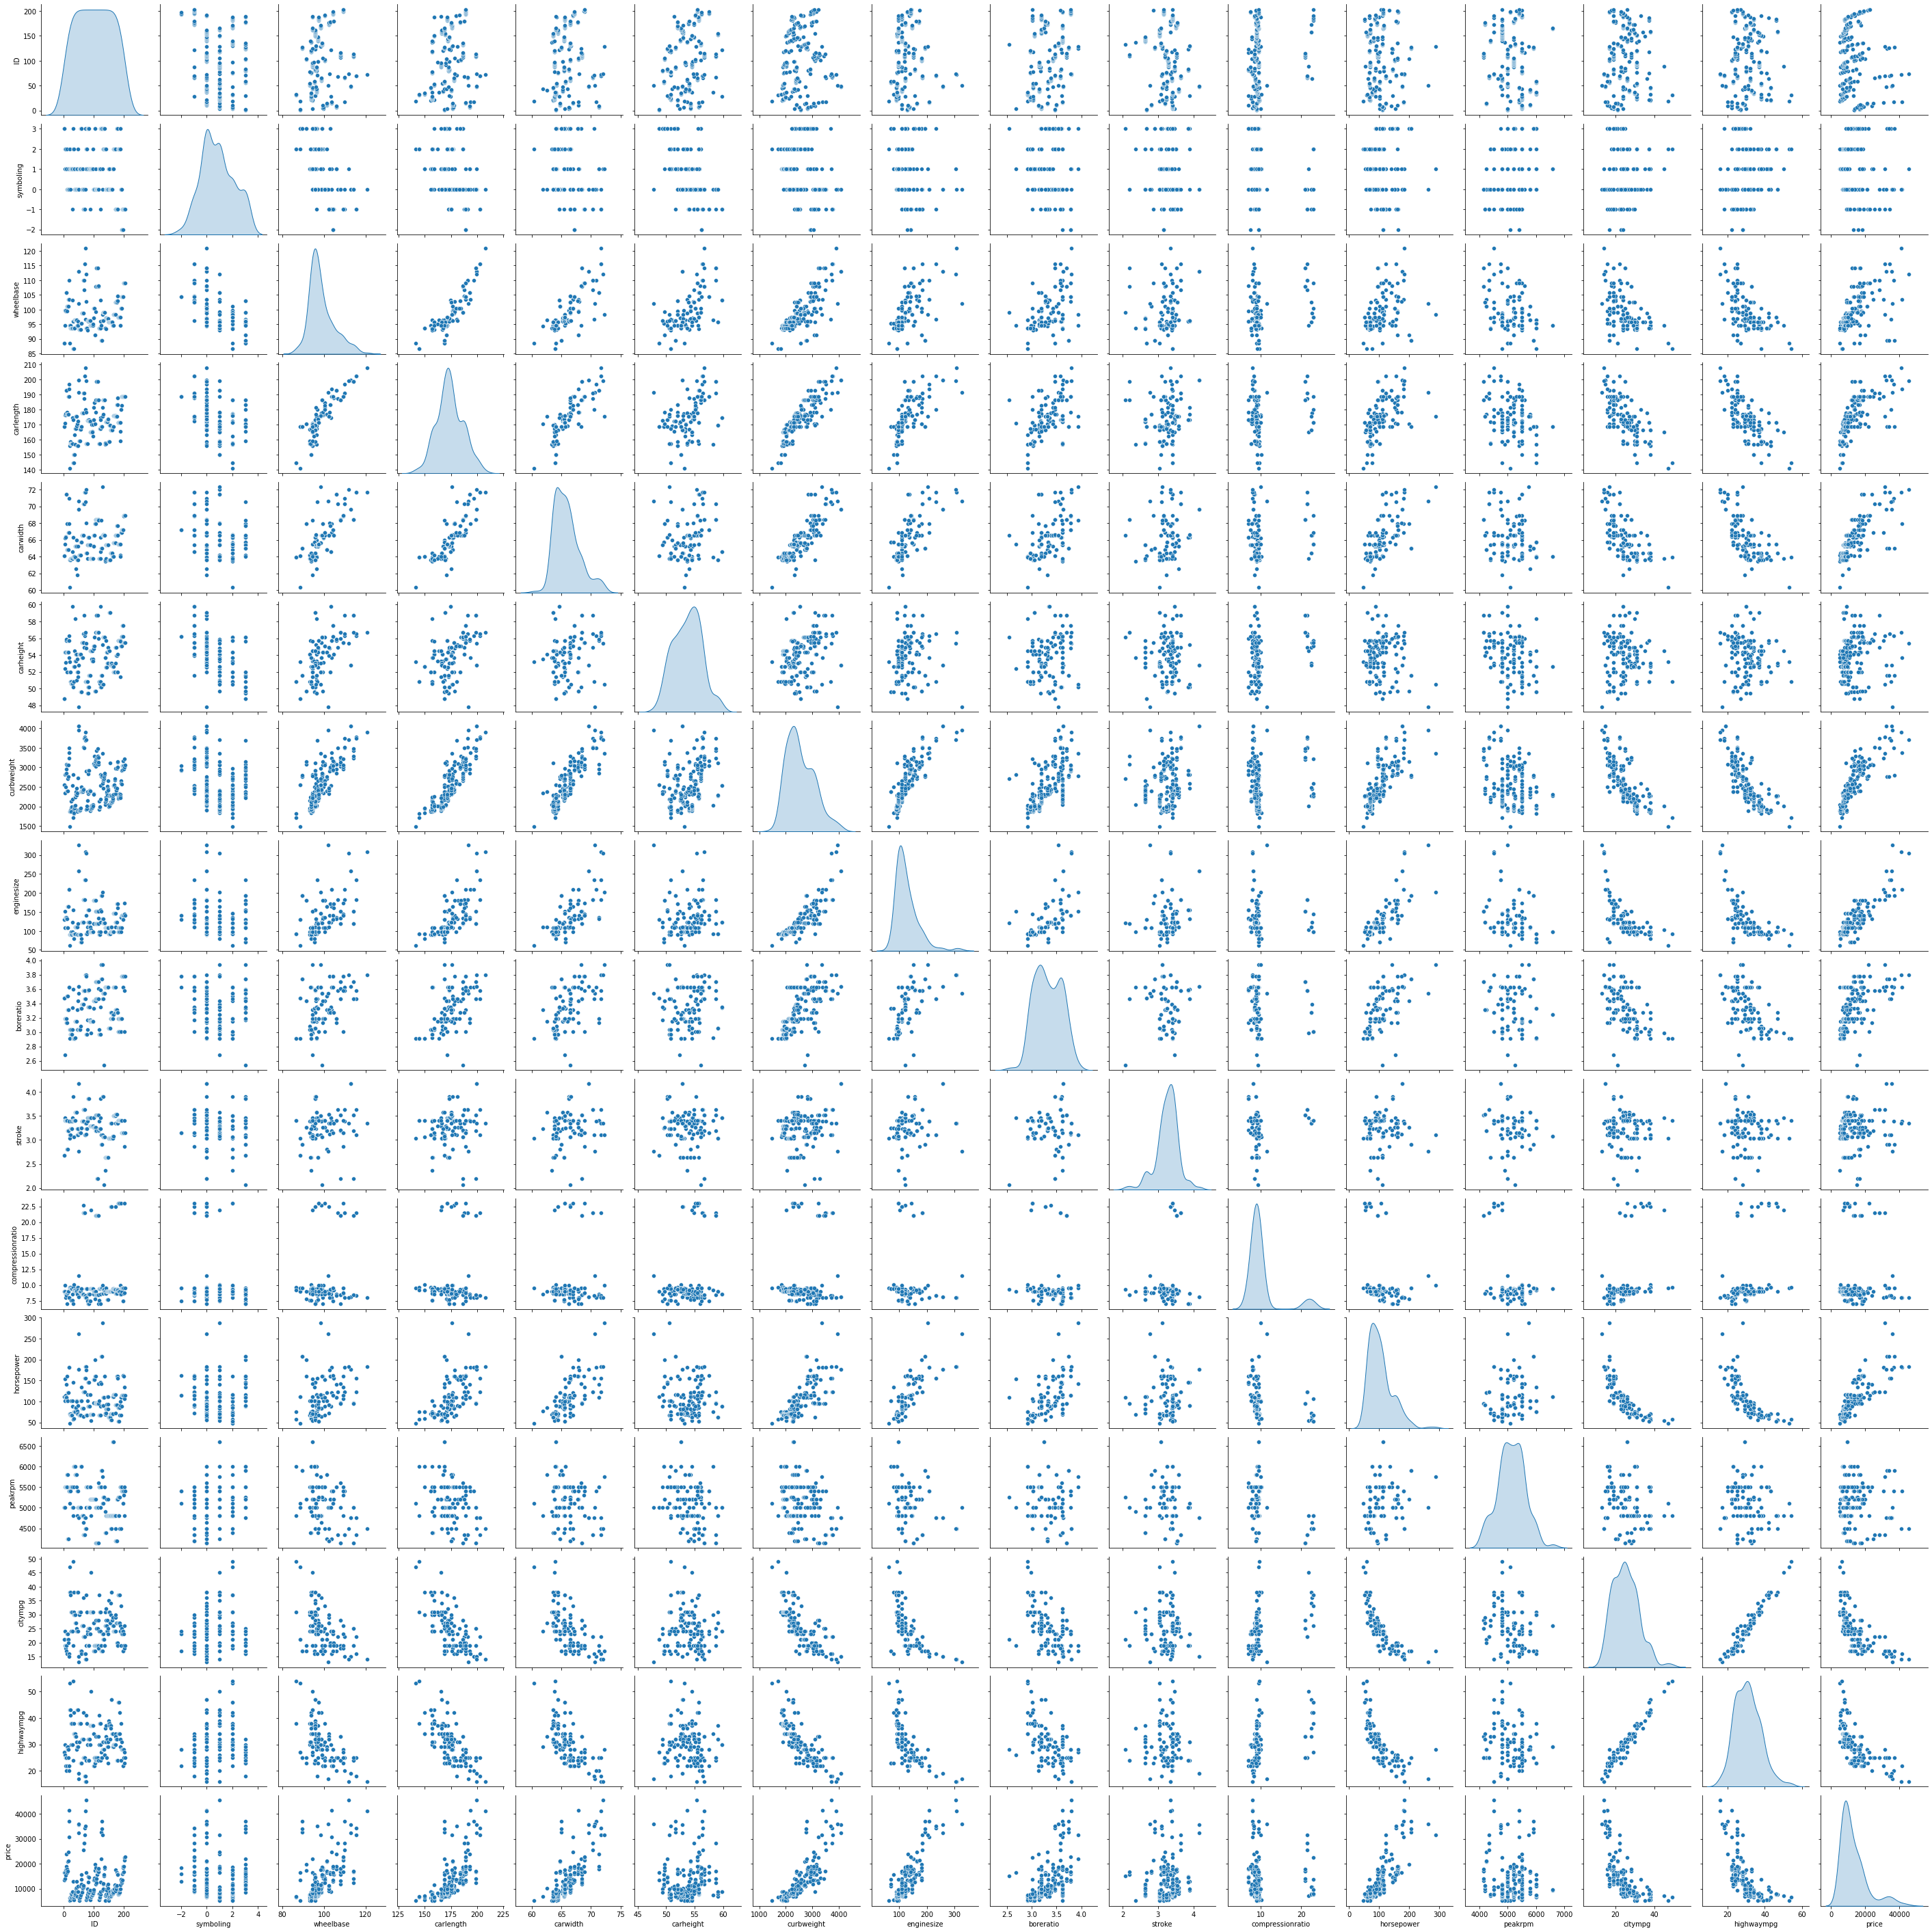

In [23]:
sns.pairplot(df,diag_kind='kde')

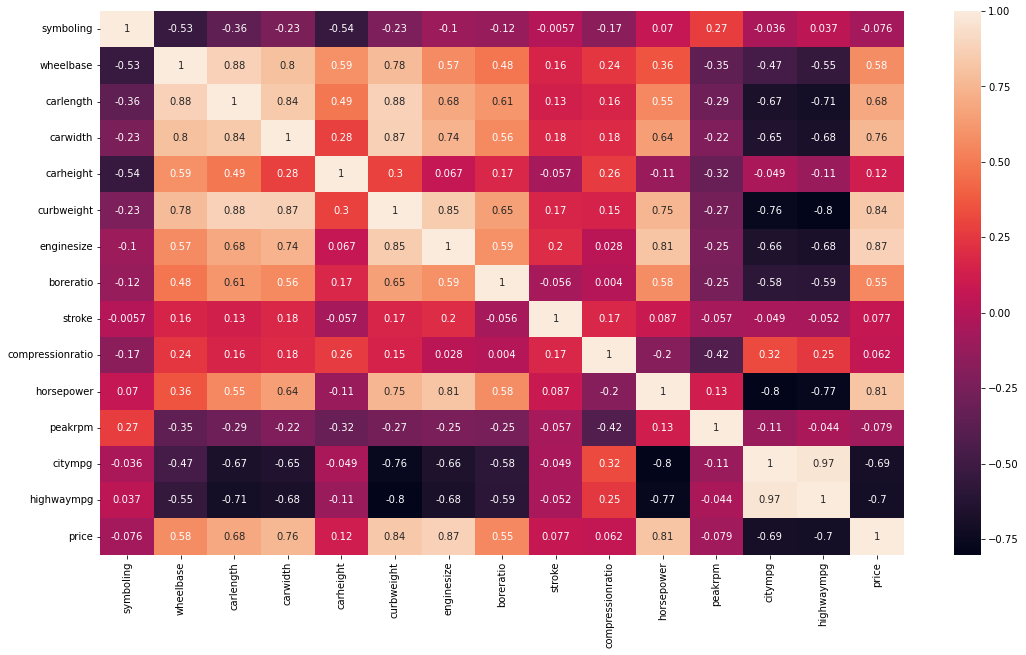

In [24]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

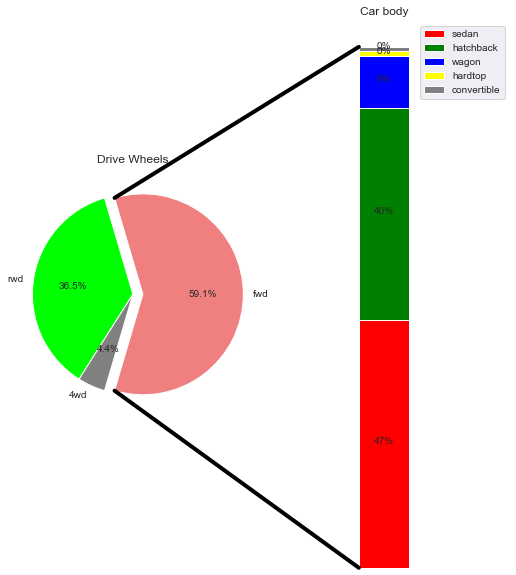

In [63]:
# make figure and assign axis objects
def pie_bar(ratios_pie, labels_pie, ratios_bar, labels_bar_tuple, colors_list, color_bar,bar_title,pie_title):
    fig = plt.figure(figsize=(9, 10.0625))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.subplots_adjust(wspace=0)

    # pie chart parameters
    ratios = ratios_pie
    labels = labels_pie
    explode = [0.1, 0,0]
    # rotate so that first wedge is split by the x-axis
    angle = -180 * ratios[0]
    ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
            labels=labels, explode=explode, colors = colors_list)
    ax1.set_title(pie_title)
    # bar chart parameters
    xpos = 0
    bottom = 0
    ratios = ratios_bar
    width = .2
    colors = color_bar

    for j in range(len(ratios)):
        height = ratios[j]
        ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
        ypos = bottom + ax2.patches[j].get_height() / 2
        bottom += height
        ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
                 ha='center')

    ax2.set_title(bar_title)
    ax2.legend(labels_bar_tuple)
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)

    # use ConnectionPatch to draw lines between the two plots
    # get the wedge data
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    bar_height = sum([item.get_height() for item in ax2.patches])

    # draw top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                          coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0, 0, 0])
    con.set_linewidth(4)
    ax2.add_artist(con)

    # draw bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                          coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(4)

    return plt.show()


labels_pie = df.drivewheels.value_counts(normalize=True).index.tolist()
ratios_pie = df.drivewheels.value_counts(normalize=True).tolist()
ratios_bar = df[df.drivewheels =="fwd"].carbody.value_counts(normalize=True).tolist()
labels_bar_tuple = tuple(df[df.drivewheels =="fwd"].carbody.value_counts(normalize=True).index.tolist())
color_bar = ['red', 'green', 'blue', 'yellow', 'grey']
color_pie = ['lightcoral', 'lime','grey']
pie_bar(ratios_pie, labels_pie, ratios_bar, labels_bar_tuple, color_pie, color_bar, "Car body","Drive Wheels")

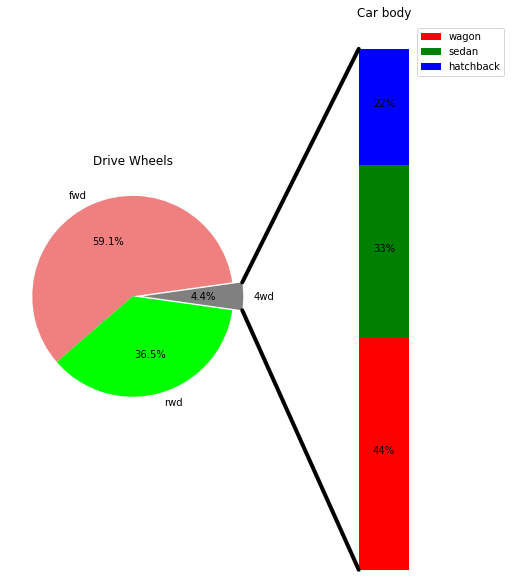

In [26]:
labels_pie = df.drivewheels.value_counts(normalize=True).index.tolist()
labels_pie.insert(0, labels_pie.pop(2))
ratios_pie = df.drivewheels.value_counts(normalize=True).tolist()
ratios_pie.insert(0, ratios_pie.pop(2))
ratios_bar = df[df.drivewheels =="4wd"].carbody.value_counts(normalize=True).tolist()
labels_bar_tuple = tuple(df[df.drivewheels =="4wd"].carbody.value_counts(normalize=True).index.tolist())
color_bar = ['red', 'green', 'blue', 'yellow', 'grey']
color_pie = ['grey', 'lightcoral','lime']
pie_bar(ratios_pie, labels_pie, ratios_bar, labels_bar_tuple, color_pie, color_bar, "Car body",'Drive Wheels')

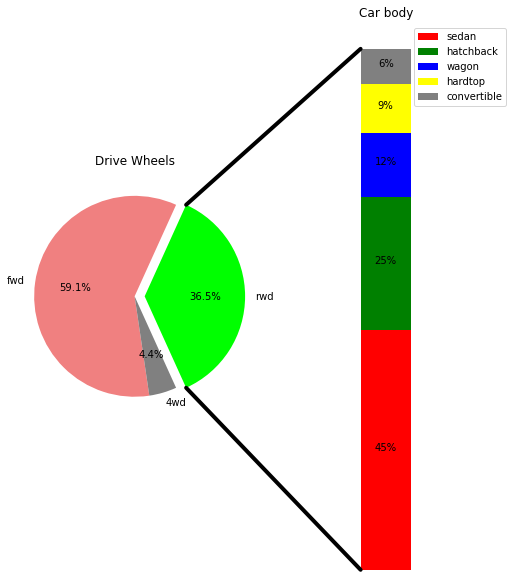

In [27]:
labels_pie = df.drivewheels.value_counts(normalize=True).index.tolist()
labels_pie.insert(0, labels_pie.pop(1))
ratios_pie = df.drivewheels.value_counts(normalize=True).tolist()
ratios_pie.insert(0, ratios_pie.pop(1))
ratios_bar = df[df.drivewheels =="rwd"].carbody.value_counts(normalize=True).tolist()
labels_bar_tuple = tuple(df[df.drivewheels =="rwd"].carbody.value_counts(normalize=True).index.tolist())
color_bar = ['red', 'green', 'blue', 'yellow', 'grey']
color_pie = ['lime', 'lightcoral','grey']
pie_bar(ratios_pie, labels_pie, ratios_bar, labels_bar_tuple, color_pie, color_bar, "Car body",'Drive Wheels')

In [28]:
data.select_dtypes("int").columns
data.select_dtypes("float").columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price'],
      dtype='object')

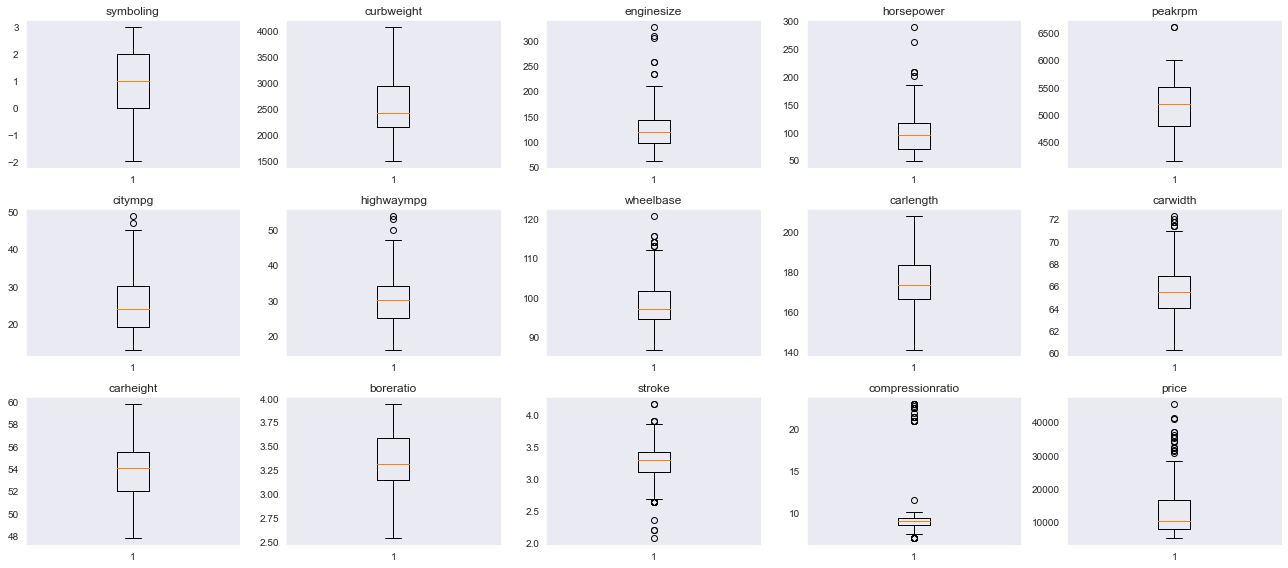

In [29]:
sns.set_style("dark")

col=['symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price']

plt.figure(figsize=(18,8))
n=np.arange(0,17,1)

for i,k in zip(col,n):
    plt.subplot(3,5,k+1)
    plt.boxplot(data[i])
    plt.title(col[k])
    plt.tight_layout()

<AxesSubplot:>

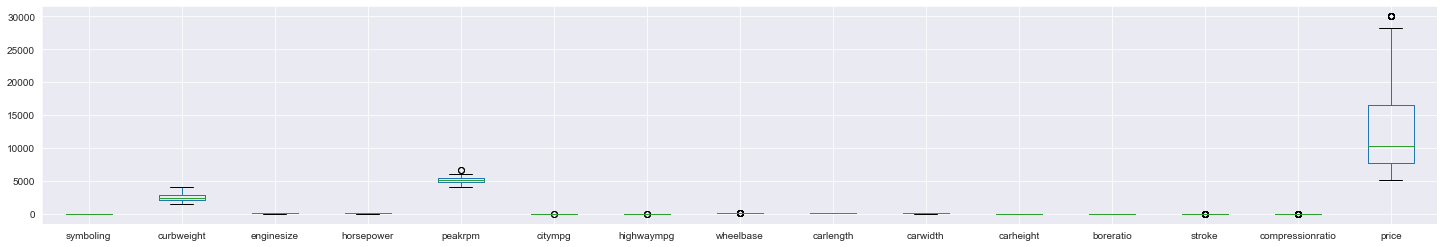

In [30]:
sns.set_style("dark")
plt.figure(figsize=(25,4))

data['compressionratio'].mode()  # mode is 9.0
data['compressionratio']=data['compressionratio'].apply(lambda x: 11.0 if x>11.0 else x)

data['horsepower']=data['horsepower'].apply(lambda x: 120 if x>200 else x)

data['horsepower'].mode()  # mode is 68.0
data['horsepower']=data['horsepower'].apply(lambda x: 68 if x>190 else x)

data['carwidth'].mode()  # mode is 68.0
data['carwidth']=data['carwidth'].apply(lambda x: 70 if x>71 else x)

data['price'].mode()  # mode is 68.0
data['price']=data['price'].apply(lambda x: 30000 if x>30000 else x)

data['enginesize'].mode()  # mode is 68.0
data['enginesize']=data['enginesize'].apply(lambda x: 200 if x>200 else x)

col2=['symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price']

data[col2].boxplot()

In [31]:
col=['fueltypes', 'aspiration', 'doornumbers', 'carbody', 'drivewheels', 'enginelocation', 'enginetype',
     'cylindernumber', 'fuelsystem']
for i in col:
    print(data[i].value_counts())
    print("\n")

gas       184
diesel     19
Name: fueltypes, dtype: int64


aspiration_std      166
aspiration_turbo     37
Name: aspiration, dtype: int64


doornumbers4    113
doornumbers2     90
Name: doornumbers, dtype: int64


sedan          94
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


drivewheels_fwd        120
drivewheels_not_fwd     83
Name: drivewheels, dtype: int64


enginelocation_front    200
enginelocation_rear       3
Name: enginelocation, dtype: int64


enginetype_ohc        146
enginetype_not_ohc     57
Name: enginetype, dtype: int64


cylindernumber4        157
cylindernumber_not4     46
Name: cylindernumber, dtype: int64


mpfi    93
2bbl    66
idi     19
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64




In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['symboling', 'carheight', 'curbweight',
        'enginesize',  'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']]


# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.936422,symboling
1,469.453345,carheight
2,221.564665,curbweight
3,80.403709,enginesize
4,242.482464,boreratio
5,118.043647,stroke
6,201.013269,compressionratio
7,54.384122,horsepower
8,133.252147,peakrpm
9,78.808845,citympg


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['symboling',
       'horsepower', 'citympg']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.440664,symboling
1,3.870451,horsepower
2,3.892633,citympg


In [34]:
data_multi=data.drop(['carheight','compressionratio','boreratio','stroke','curbweight','peakrpm','enginesize','wheelbase','carwidth','carlength','highwaympg'],axis=1)
data_multi

,symboling,fueltypes,Car_name,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem,horsepower,citympg,price
0,3,gas,alfa-romero,aspiration_std,doornumbers2,convertible,drivewheels_not_fwd,enginelocation_front,enginetype_not_ohc,cylindernumber4,mpfi,111,21,13495.0
1,3,gas,alfa-romero,aspiration_std,doornumbers2,convertible,drivewheels_not_fwd,enginelocation_front,enginetype_not_ohc,cylindernumber4,mpfi,111,21,16500.0
2,1,gas,alfa-romero,aspiration_std,doornumbers2,hatchback,drivewheels_not_fwd,enginelocation_front,enginetype_not_ohc,cylindernumber_not4,mpfi,154,19,16500.0
3,2,gas,audi,aspiration_std,doornumbers4,sedan,drivewheels_fwd,enginelocation_front,enginetype_ohc,cylindernumber4,mpfi,102,24,13950.0
4,2,gas,audi,aspiration_std,doornumbers4,sedan,drivewheels_not_fwd,enginelocation_front,enginetype_ohc,cylindernumber_not4,mpfi,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,gas,volvo,aspiration_std,doornumbers4,sedan,drivewheels_not_fwd,enginelocation_front,enginetype_ohc,cylindernumber4,mpfi,114,23,16845.0
199,-1,gas,volvo,aspiration_turbo,doornumbers4,sedan,drivewheels_not_fwd,enginelocation_front,enginetype_ohc,cylindernumber4,mpfi,160,19,19045.0
200,-1,gas,volvo,aspiration_std,doornumbers4,sedan,drivewheels_not_fwd,enginelocation_front,enginetype_not_ohc,cylindernumber_not4,mpfi,134,18,21485.0
201,-1,diesel,volvo,aspiration_turbo,doornumbers4,sedan,drivewheels_not_fwd,enginelocation_front,enginetype_ohc,cylindernumber_not4,idi,106,26,22470.0


In [35]:
data_dummies=pd.get_dummies(data_multi, drop_first=True)
data_dummies

,symboling,horsepower,citympg,price,fueltypes_gas,Car_name_alfa-romero,Car_name_audi,Car_name_bmw,Car_name_buick,Car_name_chevrolet,...,enginelocation_enginelocation_rear,enginetype_enginetype_ohc,cylindernumber_cylindernumber_not4,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,111,21,13495.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,111,21,16500.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,154,19,16500.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2,102,24,13950.0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2,115,18,17450.0,1,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,114,23,16845.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
199,-1,160,19,19045.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
200,-1,134,18,21485.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
201,-1,106,26,22470.0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [36]:
X = data_dummies.drop('price',axis=1)
y = data_dummies['price']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
base_elastic_model = ElasticNet()

In [44]:
param_grid = {'alpha':[0.1,1,2,3,4,5,6,7,8,9,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [47]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 91 candidates, totalling 455 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [48]:
grid_model.best_params_

{'alpha': 5, 'l1_ratio': 0.99}

In [49]:
y_pred = grid_model.predict(scaled_X_test)

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
mean_absolute_error(y_test,y_pred)

1316.8267238356964

In [52]:
np.sqrt(mean_squared_error(y_test,y_pred))

1620.6681682664814

In [53]:
np.mean(df['price'])

13227.101807881772

In [54]:
np.mean(data_dummies['price'])

12808.680625615763

In [55]:
test_residuals = y_test-y_pred

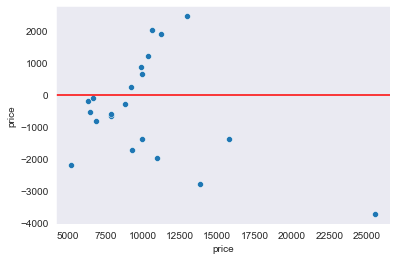

In [56]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='-')

<AxesSubplot:xlabel='price', ylabel='Density'>

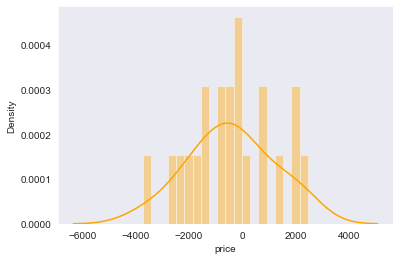

In [57]:
sns.distplot(test_residuals, bins=20, color='orange')

In [58]:
import scipy as sp

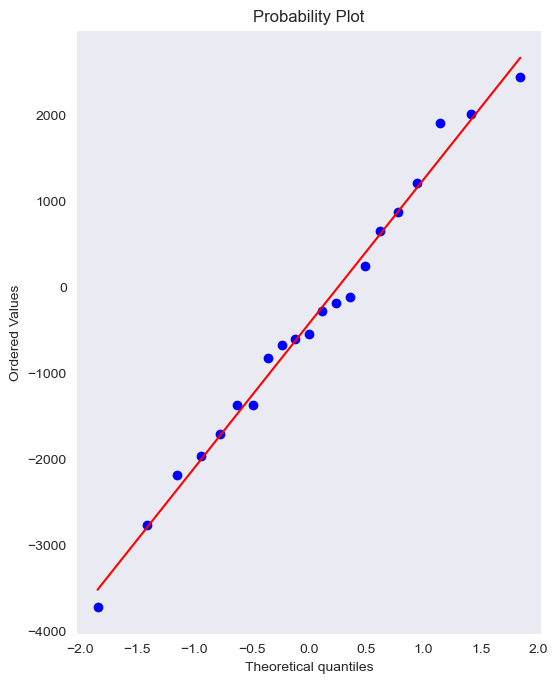

In [59]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_residuals,plot=ax)

Text(0, 0.5, 'Y Test Predicted Values')

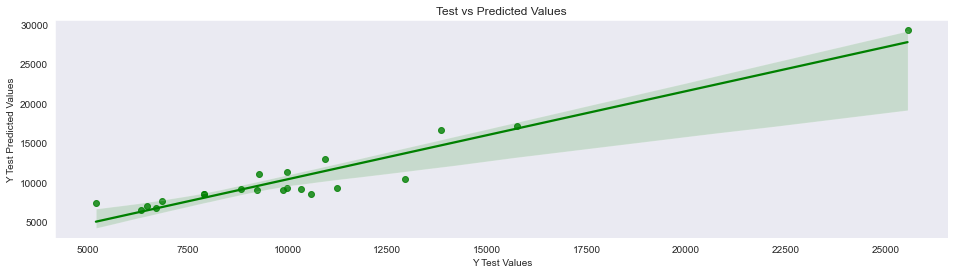

In [60]:
plt.figure(figsize=(16,4))
sns.regplot(y_test, y_pred, color="green")
plt.title("Test vs Predicted Values")
plt.xlabel("Y Test Values")
plt.ylabel("Y Test Predicted Values")

In [61]:
from joblib import dump, load

In [62]:
dump(grid_model, 'car_price_prediction_model.joblib') 

['car_price_prediction_model.joblib']